# E2-2 Tic Tac Toe Random

This is a game, in which AI starts playing, but doesn't try hard to win - makes random choice among all available cells. This gives chances to the human to win.

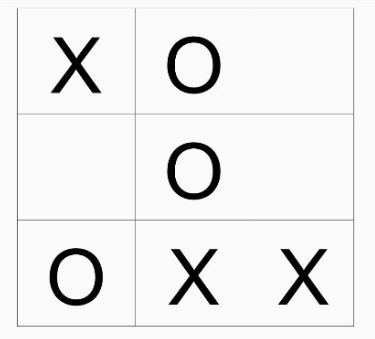

## Initialization

In [1]:
# Initialize the players and signs
EMPTY = '.'
AI = 'X'
HUMAN = 'O'

In [2]:
# print the board, leave an empty lines and spaces for visibility
def print_board(board):
    print(" ")
    print(' '.join(board[:3]))
    print(' '.join(board[3:6]))
    print(' '.join(board[6:]))
    print(" ")

In [3]:
# Initialize the board
board = EMPTY * 9
print_board(board)

 
. . .
. . .
. . .
 


In [4]:
# Define all possible winning combinations
win_cases = [
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8],
    [0, 3, 6],
    [1, 4, 7],
    [2, 5, 8],
    [0, 4, 8],
    [2, 4, 6]
]

## Game Moves

In [5]:
# Human makes move to certain cell of choice [row, column]
def human_move(board, row, column):
    # get the index of the cell the user selected: 2D -> 1D 
    index = 3 * (row - 1) + (column - 1)
    #  if this cell is empty, make the user move, otherwise do nothing
    if board[index] == EMPTY:
        # place HUMAN sign on board[index]
        return board[:index] + HUMAN + board[index+1:]
    return board

In [6]:
# AI makes a random move from all available moves
from random import choice
def ai_move(board):
    return choice(all_possible_moves(board, AI))

##  Supporting Functions

In [7]:
# Get all possible moves on the board from this position in a list 'move_list'
def all_possible_moves(board, sign):
    # start with empty list
    move_list = []
    # travers the board, i-index, v-sign
    for i, v in enumerate(board):
        if v == EMPTY:
            move_list.append(board[:i] + sign + board[i+1:])
    return move_list

In [8]:
# A winning game is if any of win-cases appears
def game_won_by(board):
    for i in win_cases:
        if board[i[0]] == board[i[1]] == board[i[2]] != EMPTY:
            # win-case, return the sign, which wins
            return board[i[0]]
    # Returns eithert the winner's sign or empty sign    
    return EMPTY

## Play The Game

In [9]:
# Play the game
def game():
    # start from empty board
    board = EMPTY * 9
    empty_cell_count = 9
    end_flag = False
    print_board(board)
    
    while empty_cell_count > 0 and not end_flag:
        # Player AI (always has odd number of options)
        if empty_cell_count % 2 == 1:
            board = ai_move(board)
        else:
            # Player HUMAN (always has even number of options)        
            # ask the player to chose a move
            row = int(input('Enter row: '))
            col = int(input('Enter column: '))
            board = human_move(board, row, col)                   
        
        # Print current board status
        print_board(board)
            
        # Count how many empty cells left
        empty_cell_count = board.count(EMPTY)      
        # empty_cell_count = sum(1 for cell in board if cell == EMPTY)
        
        # Check if someone wins already, update the flag
        end_flag = game_won_by(board) != EMPTY
     
    print('Game ended. Winner: ', game_won_by(board))

In [ ]:
# Run the game
game()

 
. . .
. . .
. . .
 
 
X . .
. . .
. . .
 
Enter row: 1
Enter column: 2
 
X O .
. . .
. . .
 
 
X O .
. X .
. . .
 


## Game Analysis

We want to know how many are the possible combinations of moves and how many times each player can win the game.

In [14]:
# all moves for all possible states for this player
def all_moves(board_list, sign):
    move_list = []
    for board in board_list:
        move_list.extend(all_possible_moves(board, sign))
    return move_list

In [15]:
# All wins of each player separated in two new lists, draws remains in the old list
def player_wins(move_list, ai_wins, human_wins):
    for board in move_list:
        won_by = game_won_by(board)
        if won_by == AI:
            ai_wins.append(board)
            move_list.remove(board)
        elif won_by == HUMAN:
            human_wins.append(board)
            move_list.remove(board)

In [16]:
# At each step count the available moves
def count_possibilities():
    board = EMPTY * 9
    move_list = [board]
    ai_wins = []
    human_wins = []
    for i in range(9):
        print('Step ' + str(i) + ': possible moves = ' + str(len(move_list)))
        sign = AI if i % 2 == 0 else HUMAN
        move_list = all_moves(move_list, sign)
        player_wins(move_list, ai_wins, human_wins)
    print('First player wins: ' + str(len(ai_wins)))
    print('Second player wins: ' + str(len(human_wins)))
    print('Draw', str(len(move_list)))
    print('Total', str(len(ai_wins) + len(human_wins) + len(move_list)))

In [17]:
count_possibilities()

Step 0: possible moves = 1
Step 1: possible moves = 9
Step 2: possible moves = 72
Step 3: possible moves = 504
Step 4: possible moves = 3024
Step 5: possible moves = 13680
Step 6: possible moves = 49402
Step 7: possible moves = 111109
Step 8: possible moves = 156775
First player wins: 106279
Second player wins: 68644
Draw 91150
Total 266073
